In [1]:
# data.place_with_parent_names.str.split('|',expand=True).iloc[:,1:6].rename(columns={1: 'Pais', 2: 'Provincia',3:'Barrio',4:'Localidad',5:'5'})


# Primer acercamiento al dataset

En la primera instancia, importamos las librerías que vamos a utilizar para nuestro análisis con sus respectivos alias. De allí obtendremos las funciones y herramientas necesarias para trabajar sobre el dataset propuesto para este trabajo.

Luego, con la función read_csv() de Pandas, asignamos a un DataFrame el dataset y empezamos a explorar sus dimensiones, contenido y tipo de datos que contiene. Algo a destacar es que los tipos de datos de las columnas parecieran ser los correctos: las columnas que contienen datos numéricos son float64 (con excepción de la columna "lat-lon" que contiene caracteres no numéricos) y el resto son object, es decir, strings de acuerdo a lo que interpreta Pandas. Esto nos ahorra el paso de tener que hacer la conversión de formatos.

In [2]:
# Importamos las librerías que vamos a usar para el análisis.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
# Importamos el dataset y lo asignamos a un DataFrame.

data = pd.read_csv('properati.csv', index_col='Unnamed: 0')

In [4]:
# Dimensiones del DataFrame.

data.shape

(121220, 25)

In [5]:
# Nombres de las columnas y tipos de datos que contienen.

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121220 entries, 0 to 121219
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   operation                   121220 non-null  object 
 1   property_type               121220 non-null  object 
 2   place_name                  121197 non-null  object 
 3   place_with_parent_names     121220 non-null  object 
 4   country_name                121220 non-null  object 
 5   state_name                  121220 non-null  object 
 6   geonames_id                 102503 non-null  float64
 7   lat-lon                     69670 non-null   object 
 8   lat                         69670 non-null   float64
 9   lon                         69670 non-null   float64
 10  price                       100810 non-null  float64
 11  currency                    100809 non-null  object 
 12  price_aprox_local_currency  100810 non-null  float64
 13  price_aprox_us

## Modificación de campos y dropeo de columnas

Para poder trabajar con mayor comodidad y mejorar la legibilidad del código, optamos por cambiar el nombre de las columnas por sus respectivas traducciones al español. Luego, con la función drop() descartamos las columnas que creemos que no vamos a utilizar: 'Operación', 'Latitud-Longitud', 'Latitud', 'Longitud', 'ID geonombre', 'URL Propierati', 'Thumbnail imagen'.

Tomamos esta decisión porque Operación es redundante, ya que en el 100% de los casos se trata de operaciones de venta, e ID Geonombre, URL Propierati y Thumbnail imagen son datos que no nos ayudan en lo predictivo ni en completar posibles valores faltantes. En el caso de las de latitud y longitud, si bien hicimos un chequeo de sus contenidos en caso de necesitarlos para el desafío de Machine Learning, consideramos que para el análisis actual es innecesario (incorporamos el código comentado al final de la notebook).

Además, analizamos las filas duplicadas y dropeamos las que aparecen más de una vez. Optamos por quedarnos con la primera instancia de cada una.

In [6]:
# Reasignación de nombres de columnas.

data.columns = ['Operación', 'Tipo de propiedad', 'Localidad', 'Localidad con nombres',
       'País', 'Provincia', 'ID geonombre', 'Latitud-longitud', 'Latitud', 'Longitud',
       'Precio', 'Moneda', 'Precio aproximado ($)', 'Precio aproximado (U$S)',
       'Superficie total en m2', 'Superficie cubierta en m2', 'Precio U$S por m2',
       'Precio por m2', 'Piso', 'Habitaciones', 'Expensas', 'URL Propierati',
       'Descripción', 'Título', 'Thumbnail imagen']

In [7]:
# Visualización de las primeras 10 filas del DataFrame para obtener un panorama más claro de nuestro objeto de trabajo.

data.head(10)

,Operación,Tipo de propiedad,Localidad,Localidad con nombres,País,Provincia,ID geonombre,Latitud-longitud,Latitud,Longitud,...,Superficie cubierta en m2,Precio U$S por m2,Precio por m2,Piso,Habitaciones,Expensas,URL Propierati,Descripción,Título,Thumbnail imagen
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...
5,sell,house,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Argentina,Entre Ríos,3433657.0,"-33.0140714,-58.519828",-33.014071,-58.519828,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bop_venta_depart...,"Casa en el perímetro del barrio 338, ubicada e...","Casa Barrio 338. Sobre calle 3 de caballería, ...",https://thumbs4.properati.com/6/q-w68gvaUEQVXI...
6,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782,...,78.0,1226.415094,1666.666667,NaN,NaN,NaN,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",https://thumbs4.properati.com/5/6GOXsHCyDu1aGx...
7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...
8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,...,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...
9,sell,house,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.942031,-60.7259192",-32.942031,-60.725919,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15box_venta_casa_r...,MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWH...,WHITE 7637 - 2 DORMIT

In [8]:
data['Operación'].value_counts()

sell    121220
Name: Operación, dtype: int64

In [9]:
# Dropeo de columnas que no vamos a utilizar.

data.drop(['Operación', 'Latitud-longitud', 'Latitud', 'Longitud', 'ID geonombre', 'URL Propierati', 'Thumbnail imagen'], axis=1, inplace=True)

In [10]:
# Dropeo de filas duplicadas.

duplicated_mask = data.duplicated(keep = "first")

print ("Cantidad de registros duplicados")
print(sum(duplicated_mask))

print ("Cantidad de filas de data antes de eliminar duplicados")
print(data.shape[0])

data = data.drop_duplicates(keep = "first")

print ("Cantidad de filas de data después de eliminar duplicados")
data.shape[0]

Cantidad de registros duplicados
5237
Cantidad de filas de data antes de eliminar duplicados
121220
Cantidad de filas de data después de eliminar duplicados


115983

Como observamos que los tipos de propiedad están en inglés y, nuevamente, para mejorar la legibilidad del código y los datos, los pasamos a español. Para eso hacemos obtenemos los valores únicos de la columna con unique() y creamos un diccionario para cambiarlos con la función map().

In [11]:
# Valores de la columna 'Tipo de propiedad'.

data['Tipo de propiedad'].unique()

array(['PH', 'apartment', 'house', 'store'], dtype=object)

In [12]:
# Reemplazo de valores de la columna 'Tipo de propiedad' por sus equivalentes en español.

tipo_propiedad_dict = {'PH':'PH', 'apartment':'Departamento', 'house':'Casa', 'store':'Local'}

data['Tipo de propiedad'] = data['Tipo de propiedad'].map(tipo_propiedad_dict)

Al haber descartado las columnas que no nos interesa trabajar y tener los valores de texto en español para facilitar el trabajo posterior, nos interesa saber qué cantidad y porcentaje de valores faltantes tenemos por columna.

Como las columnas de Precio, Precio aproximado ($) y Precio aproximado (U$S) tienen la misma cantidad de valores faltantes, realizamos la verificación de si son las mismas filas. Creamos las máscaras booleanas que chequean esta relación y vemos que efectivamente este es el caso.

In [13]:
# Cantidad de datos faltantes por columna.

for col in data.columns:
    print(col + " " + str(data[col].isna().sum()))

Tipo de propiedad 0
Localidad 23
Localidad con nombres 0
País 0
Provincia 0
Precio 17496
Moneda 17497
Precio aproximado ($) 17496
Precio aproximado (U$S) 17496
Superficie total en m2 38361
Superficie cubierta en m2 18839
Precio U$S por m2 49218
Precio por m2 30374
Piso 108326
Habitaciones 69898
Expensas 101902
Descripción 2
Título 0


In [14]:
# Porcentaje de datos faltantes por columna.

for col in data.columns:
    print(col + " " + str(round(data[col].isna().sum() / len(data[col]) * 100, 2)) + "%")

Tipo de propiedad 0.0%
Localidad 0.02%
Localidad con nombres 0.0%
País 0.0%
Provincia 0.0%
Precio 15.08%
Moneda 15.09%
Precio aproximado ($) 15.08%
Precio aproximado (U$S) 15.08%
Superficie total en m2 33.07%
Superficie cubierta en m2 16.24%
Precio U$S por m2 42.44%
Precio por m2 26.19%
Piso 93.4%
Habitaciones 60.27%
Expensas 87.86%
Descripción 0.0%
Título 0.0%


In [15]:
# Verificación de que los NaN coinciden en las columnas de precio, precio en $ y precio en U$S.

mascara_precio_pesos = data["Precio aproximado ($)"].isnull()
mascara_precio_dolares = data["Precio aproximado (U$S)"].isnull()
mascara_precio = data['Precio'].isnull()

print((mascara_precio_pesos == mascara_precio_dolares).value_counts())
print((mascara_precio_pesos == mascara_precio).value_counts())
print((mascara_precio == mascara_precio_dolares).value_counts())

True    115983
dtype: int64
True    115983
dtype: int64
True    115983
dtype: int64


## Trabajo sobre localidades, ciudades y provincias

Como el dataset tiene varias columnas destinadas a informar la ubicación de las propiedades, nos interesó ver si coinciden

In [16]:
#Vemos la cantidad de valores que tenemos por país para corroborar que sean todos en Argentina

print ("Cantidad de valores distintos en la columna pais: " + str(data["País"].value_counts()))
print ("Longitud del dataset: " + str(len(data)))

Cantidad de valores distintos en la columna pais: Argentina    115983
Name: País, dtype: int64
Longitud del dataset: 115983


In [17]:
#Dropeamos la columna país por ser redundante

data.drop('País', axis=1, inplace=True)

In [18]:
#ahora voy a separar el campo  localidad con nombres, para comparar con las demas columnas por el separador de |

Localidad_con_nombres = data.loc[:,"Localidad con nombres"].str.split(pat='|', expand=True)
print ("La cantidad de columnas que genero la separacion es: ")
Localidad_con_nombres.shape[1]

#por lo que me da la pauta de que habia datos con mas de dos separadores como se esperaba, luego tendremos que revisar eso

La cantidad de columnas que genero la separacion es: 


7

In [19]:
#Me quedo con la primer columna que deberia ser el pais
print ("Cantidad de valores distintos en la columna pais que se extrae el campo localidades con nombre:")
print (Localidad_con_nombres.loc[:,1].value_counts())

print ("Nos aseguramos que tanto el parceo del campo localidades con nombre, tenga siempre argentina y el campo Pais que venia en el data set tambien")

Cantidad de valores distintos en la columna pais que se extrae el campo localidades con nombre:
Argentina    115983
Name: 1, dtype: int64
Nos aseguramos que tanto el parceo del campo localidades con nombre, tenga siempre argentina y el campo Pais que venia en el data set tambien


In [20]:
#Analizamos la segunda columna, que es la de provincia
Provincia_parceada = Localidad_con_nombres.loc[:, 2]
#voy a comparar si el contenido de ese campo tambien es el mismo que en la columna original de provincia
Provincia_original = data['Provincia']

provincias_iguales = Provincia_original.equals(Provincia_parceada)

print ("Las columnas Provincia del data set y el parceo de la columna -Localidad con nombres- arrojan el mismo resultado??")
print (provincias_iguales)

Las columnas Provincia del data set y el parceo de la columna -Localidad con nombres- arrojan el mismo resultado??
True


In [21]:
#Voy a analizar el contenido del campo
Provincia_original.value_counts()

Capital Federal                 30722
Bs.As. G.B.A. Zona Norte        24690
Bs.As. G.B.A. Zona Sur          13543
Córdoba                         11581
Buenos Aires Costa Atlántica     9898
Bs.As. G.B.A. Zona Oeste         9037
Santa Fe                         9029
Buenos Aires Interior            2250
Río Negro                         789
Mendoza                           656
Tucumán                           635
Neuquén                           587
Corrientes                        575
Misiones                          453
Entre Ríos                        364
Salta                             276
Chubut                            259
San Luis                          245
La Pampa                          153
Chaco                              57
San Juan                           40
Formosa                            32
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
La Rioja    

In [22]:
#Normalizo todos los nombres de las provincias que corresponden a buenos aires
#data['Provincia'] = data['Provincia'].apply(lambda x: x if x is np.NaN else re.sub('Bs.As.*\w+|Buenos Aires.*\w+', "Buenos Aires", x))

#data['Provincia'].value_counts()

In [23]:
#lo primero que ponemos en ese campo nuevo son los valores que coinciden tanto para la localidad parceada como para la original
def localidad_limpia(numero_columna):
    Localidad_parceada = Localidad_con_nombres.loc[:,numero_columna]
    Localidad_Original = data.Localidad

    mask_localidades_iguales = Localidad_parceada == Localidad_Original
    data.loc[mask_localidades_iguales, "Localidad_limpia"] = data.loc[mask_localidades_iguales, "Localidad"]

localidad_limpia(3)

def nulos_localidad():
    return print("Aun quedan " + str(data["Localidad_limpia"].isna().sum() ) + " valores nulos en el campo Localidad limpia")
    
nulos_localidad()

Aun quedan 33911 valores nulos en el campo Localidad limpia


In [24]:
Localidad_parceada = Localidad_con_nombres.loc[:,3]

#Como la columna localidad tenia ciertos valores nulos, voy a ver que tiene la columna parceada en esos registros

mask_localidad_original_nula = data.Localidad.isna()
print(Localidad_parceada.loc[mask_localidad_original_nula].value_counts())

#veo que en todos esos registros es tigre la localidad, asi que la pegamos en la columna limpia
data.loc[mask_localidad_original_nula, "Localidad_limpia"] = Localidad_parceada[mask_localidad_original_nula]
nulos_localidad()

Tigre    23
Name: 3, dtype: int64
Aun quedan 33888 valores nulos en el campo Localidad limpia


In [25]:
localidad_limpia(4)
nulos_localidad()
localidad_limpia(5)
nulos_localidad()
localidad_limpia(6)
nulos_localidad()

Aun quedan 4935 valores nulos en el campo Localidad limpia
Aun quedan 4402 valores nulos en el campo Localidad limpia
Aun quedan 4402 valores nulos en el campo Localidad limpia


In [26]:
#veamos que valores tienen los campos que nos faltan en los campos parceados.

mask_localidad_limpia_nulos=data.Localidad_limpia.isnull()
mask_localidad_limpia_nulos.sum()
localidades_parceadas_aun_nulas = Localidad_con_nombres.loc[mask_localidad_limpia_nulos,[3,4,5,6]]

print("En la columna 6, " +  str(localidades_parceadas_aun_nulas[6].isnull().sum()) + " son nulos")
print("En la columna 5, " +  str(localidades_parceadas_aun_nulas[5].isnull().sum()) + " son nulos")
print("En la columna 4, " +  str(localidades_parceadas_aun_nulas[4].isnull().sum()) + " son nulos")
print("En la columna 3, " +  str(localidades_parceadas_aun_nulas[3].isnull().sum()) + " son nulos")

#pareciera que la unica columna que puede aportar algo es la numero 3, pero en realidad todo el contenido de la misma parece ser nulo

#ATENCION
#ATENCION
#deberia ver bien como puedo probar q esos valores son nulos
#ATENCION
#ATENCION

En la columna 6, 4402 son nulos
En la columna 5, 4402 son nulos
En la columna 4, 4402 son nulos
En la columna 3, 0 son nulos


In [27]:
# vamos a ver los valores que tenia la columna de Localidad original
#data.loc[mask_localidad_limpia_nulos,"Localidad" ].value_counts()

data.loc[mask_localidad_limpia_nulos,"Localidad" ].value_counts()


Córdoba                         2496
Capital Federal                 1083
Bs.As. G.B.A. Zona Norte         221
Mendoza                          129
Buenos Aires Interior            106
Tucumán                           75
Bs.As. G.B.A. Zona Oeste          64
Misiones                          43
Santa Fe                          32
Buenos Aires Costa Atlántica      27
Bs.As. G.B.A. Zona Sur            24
Salta                             21
San Luis                          19
Chubut                            17
Neuquén                           10
Río Negro                          8
San Juan                           7
Tierra Del Fuego                   6
La Pampa                           3
Santiago Del Estero                3
Catamarca                          3
Corrientes                         2
Jujuy                              1
Chaco                              1
La Rioja                           1
Name: Localidad, dtype: int64

In [28]:
#me voy a fijar que no sea una copia de lo q tienen en la columna provincia
mask_localidad_igual_provincia = data.loc[mask_localidad_limpia_nulos,"Provincia" ] == (data.loc[mask_localidad_limpia_nulos,"Localidad"])
mask_localidad_igual_provincia.sum()

4402

In [29]:
#aun quenda estas localidades nulas
print ('Aun falta la localidad de ' + str(data['Localidad_limpia'].isna().sum()) + ' registros')

Aun falta la localidad de 4402 registros


In [30]:
#imprimo que hay en la localidad original de los valores que aun me faltan imputar haciendo foco en las localidades que luego van a ser de interes
mask_localidad_limpia_nulos=data.Localidad_limpia.isnull()
localidad = data.loc[mask_localidad_limpia_nulos,["Localidad"]]
localidad["Localidad"].value_counts()

Córdoba                         2496
Capital Federal                 1083
Bs.As. G.B.A. Zona Norte         221
Mendoza                          129
Buenos Aires Interior            106
Tucumán                           75
Bs.As. G.B.A. Zona Oeste          64
Misiones                          43
Santa Fe                          32
Buenos Aires Costa Atlántica      27
Bs.As. G.B.A. Zona Sur            24
Salta                             21
San Luis                          19
Chubut                            17
Neuquén                           10
Río Negro                          8
San Juan                           7
Tierra Del Fuego                   6
La Pampa                           3
Santiago Del Estero                3
Catamarca                          3
Corrientes                         2
Jujuy                              1
Chaco                              1
La Rioja                           1
Name: Localidad, dtype: int64

In [31]:
#me fijo que tengo tambien en la primer columna que deberia ser localidad de los valores parceados
localidades_a_revisar = Localidad_con_nombres.loc[mask_localidad_limpia_nulos]
localidades_a_revisar.columns = ['pais_1','provincia_1','localidad_1','localidad_2','localidad_3','localidad_4','localidad_5']
print(localidades_a_revisar['localidad_1'].value_counts())

Córdoba                         2496
Capital Federal                 1083
Bs.As. G.B.A. Zona Norte         221
Mendoza                          129
Buenos Aires Interior            106
Tucumán                           75
Bs.As. G.B.A. Zona Oeste          64
Misiones                          43
Santa Fe                          32
Buenos Aires Costa Atlántica      27
Bs.As. G.B.A. Zona Sur            24
Salta                             21
San Luis                          19
Chubut                            17
Neuquén                           10
Río Negro                          8
San Juan                           7
Tierra Del Fuego                   6
La Pampa                           3
Santiago Del Estero                3
Catamarca                          3
Corrientes                         2
Jujuy                              1
Chaco                              1
La Rioja                           1
Name: localidad_1, dtype: int64


In [32]:
#me aseguro de fijarme que sean iguales la localidad original en los casos de interes contra la primer columna de la localidad parceada
localidad_original_localidad_parceada_1 = localidad["Localidad"].equals(localidades_a_revisar['localidad_1'])

print ("Las columnas Provincia del data set y el parceo de la columna -Localidad con nombres- arrojan el mismo resultado en las filas que aun faltan rellenar??")
print (provincias_iguales)
print ('Como lo que muestran no son nombres de localidades voy a ver que dice la proxima columna parceada')

Las columnas Provincia del data set y el parceo de la columna -Localidad con nombres- arrojan el mismo resultado en las filas que aun faltan rellenar??
True
Como lo que muestran no son nombres de localidades voy a ver que dice la proxima columna parceada


In [33]:

print( 'nulos en la columna siguiente a analizar (localidad_2) ' + str(localidades_a_revisar['localidad_2'].isnull().sum()))
print( 'nulos en la columna siguiente a analizar (localidad_3) ' + str(localidades_a_revisar['localidad_3'].isnull().sum()))
print( 'nulos en la columna siguiente a analizar (localidad_4) ' + str(localidades_a_revisar['localidad_4'].isnull().sum()))
print( 'nulos en la columna siguiente a analizar (localidad_5) ' + str(localidades_a_revisar['localidad_5'].isnull().sum()))

print('la unica columna que no esta en nulo es la de localidad 2, pero si imprimimos el contenido, todos los campos dicen lo mismo y debe ser un caracter en blanco o algo por el estilo')

print(localidades_a_revisar['localidad_2'].value_counts())

nulos en la columna siguiente a analizar (localidad_2) 0
nulos en la columna siguiente a analizar (localidad_3) 4402
nulos en la columna siguiente a analizar (localidad_4) 4402
nulos en la columna siguiente a analizar (localidad_5) 4402
la unica columna que no esta en nulo es la de localidad 2, pero si imprimimos el contenido, todos los campos dicen lo mismo y debe ser un caracter en blanco o algo por el estilo
    4402
Name: localidad_2, dtype: int64


In [34]:
#
#          ENTONCES ESAS 4021 LOCALIDADES QUE AUN FALTAN, NO SE PUEDEN IMPUTAR, SE DEBEN DESCARTAR ESOS REGISTROS DEL DATA SET
#

In [35]:
mask_localidad_limpia_nulos=data.Localidad_limpia.notnull()

data = data.loc[mask_localidad_limpia_nulos]
print ('el data set nos queda por ahora con ' + str(data.shape[0]) + ' registros')

#elimino un par de columnas que ahora quedan como basura

data.drop(['Localidad con nombres', 'Localidad'],axis=1,  inplace=True)


el data set nos queda por ahora con 111581 registros


In [36]:
data = data.rename(columns={'Localidad_limpia':'Localidad'})

In [37]:
#me fijo cuantos nulos aun tengo en el data set, haciendo foco en pais, provincia, y localidad, que deberia estar totalmente completo

for col in data.columns:
    print(col + " " + str(data[col].isna().sum()))

Tipo de propiedad 0
Provincia 0
Precio 16717
Moneda 16717
Precio aproximado ($) 16717
Precio aproximado (U$S) 16717
Superficie total en m2 36717
Superficie cubierta en m2 17681
Precio U$S por m2 47169
Precio por m2 28785
Piso 104024
Habitaciones 65857
Expensas 98140
Descripción 2
Título 0
Localidad 0


# Análisis de la columna 'Descripción'

En este momento decidimos explorar la columna 'Descripción' para investigar qué información interesante y útil podíamos relevar de su contenido y qué campos podíamos completar de las columnas que quedaron en nuestro dataset. Para esto nos valimos de las expresiones regulares.

Elegimos las siguientes palabras claves para apligar las RegEx: habitación, habitaciones, dormitorio, baño, baños, patio, cochera, lavadero, amenities, ambientes, toilette, laundry, pileta



In [38]:
# Analizamos las 10 primeras observaciones para ver si los strings son uniformes. Resultan muy variados para trabajar.

for i in range(10):  
    print(data['Descripción'][i] + "\n\n")

2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).


Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000                     Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).


2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION     Aviso publicado por Pixel In

In [39]:
# Creamos una nueva columna, 'Descripción limpia', para trabajarsu contenido con todos los strings en minúscula.

data['Descripción limpia'] = data['Descripción'].str.lower()

In [40]:
# Ahora vamos a reemplazar todos los números escritos con letras, por sus respectivos dígitos decimales. Ya que usualmente
# se usa para el número de habitaciones o baños, raramente tendremso un número mayor a 5, por lo cual sólo buscaremos y 
# reemplazaremos las cadenas "un" , "dos", "tres", "cuatro" y "cinco"

data['Descripción limpia'] = data['Descripción limpia'].apply(lambda x: x if x is np.NaN else re.sub('\s(un)\s', ' 1 ', x))
data['Descripción limpia'] = data['Descripción limpia'].apply(lambda x: x if x is np.NaN else re.sub('\s(dos)\s', ' 2 ', x))
data['Descripción limpia'] = data['Descripción limpia'].apply(lambda x: x if x is np.NaN else re.sub('\s(tres)\s', ' 3 ', x))
data['Descripción limpia'] = data['Descripción limpia'].apply(lambda x: x if x is np.NaN else re.sub('\s(cuatro)\s', ' 4 ', x))
data['Descripción limpia'] = data['Descripción limpia'].apply(lambda x: x if x is np.NaN else re.sub('\s(cinco)\s', ' 5 ', x))


### Número de habitaciones/dormitorios

In [41]:
# Buscamos las palabras clave "habitación/es", "dormitorio/s" con su cantidad y guardamos los resultados en una nueva columna

patron_dormit = '(\d)?(\d)?(\s+)(habitac|dormit)'
regex_dormit = re.compile(patron_dormit)

data['Dormitorios descripción'] = data['Descripción limpia'].apply(lambda x: x if x is np.NaN else re.search(regex_dormit,x))

dormit_mask = data['Dormitorios descripción'].notnull()

# Guardamos el resultado de la búsqueda (Group 0) en la misma columna
data['Dormitorios descripción'] = data.loc[dormit_mask,'Dormitorios descripción'].apply(lambda x: x.group(0))

data['Dormitorios descripción']

0           dormit
1           dormit
2           dormit
3              NaN
4         1 dormit
            ...   
121214         NaN
121215    2 dormit
121216    3 dormit
121217         NaN
121218      dormit
Name: Dormitorios descripción, Length: 111581, dtype: object

In [42]:
# Realizamos una nueva búsqueda para dejar sólo el número de habitaciones, y asignaremos 1 en caso que no encuentre.
# Al número encontrado lo asignamos como tipo 'int'.

data.loc[dormit_mask,'Dormitorios descripción'] = data.loc[dormit_mask,'Dormitorios descripción'].apply(lambda x: re.search('\d?\d',x))

# Volvemos a guardar sobre la misma columna el resultado de búsqueda (Group 0) y asingamos 1 en caso de None (búsqueda sin 
# resultado)
data.loc[dormit_mask,'Dormitorios descripción'] = data.loc[dormit_mask,'Dormitorios descripción'].apply(lambda x: 1 if x is None else int(x.group(0)))  

data.loc[dormit_mask,'Dormitorios descripción']

0         1
1         1
2         1
4         1
5         2
         ..
121212    1
121213    3
121215    2
121216    3
121218    1
Name: Dormitorios descripción, Length: 76169, dtype: object

In [43]:
# Analizamos los resultados que obtuvimos.

porc_habit = round(dormit_mask.sum()/data.shape[0]*100, 2)
print("Porcentaje de filas con datos: "+ str(porc_habit)+' %')

data['Dormitorios descripción'].value_counts()

Porcentaje de filas con datos: 68.26 %


1     34754
2     22662
3     14449
4      3360
5       560
      ...  
48        1
43        1
36        1
29        1
95        1
Name: Dormitorios descripción, Length: 69, dtype: int64

In [44]:
# Encontramos 218 propiedades con más de 10 habitaciones, casos que habría que analizar si son válidos o no.

mask = data['Dormitorios descripción']>10
print("Cant. prop > 10 habit: " + str(mask.sum()))
print("Porc. de la muestra: "+ str(round(mask.sum()/data.shape[0]*100,2))+'%')

data.loc[mask,['Descripción limpia','Dormitorios descripción']].sample(10)

# Dado que la cantidad de propiedades con mas de 10 habitaciones es muy baja en relación a la muestra, 
# para evitar errores y sesgos descartamos estos valores.

Cant. prop > 10 habit: 201
Porc. de la muestra: 0.18%


,Descripción limpia,Dormitorios descripción
77219,excelente hotel boutique en venta - corazón de...,12
48736,piso 2°c. hermoso departamento (apto profesion...,60
100344,venta de casa americana a refaccionar en caste...,23
48861,"piso 2° ""e"". gran ambiente, con balcón !!! súp...",60
18180,se trata de una propiedad desarrollada todo en...,14
61975,departamento en ventario de janeiro al 300 2 a...,70
111193,"ubicada en callejón privado, con salida sobre ...",54
94695,"excelente unidad de 2 ambientes, ubicada en el...",40
93427,\texcelente piso de 6 ambientes con dependenc...,44
76982,"apta credito bancariocasa sobre lote de 8,66 x...",75


In [45]:
data.loc[119741,'Descripción limpia']

'corredor responsable: martin macagno - cucicba 6267contacto: rosana romera - mls id # 420561019-66departamento de 2 ambientes en venta  con balcon contra-frente luminoso - apto credito living-comedor:4,13 x 2,85 dormitorio:3,18 x 2,74 cocina: 2,40 x 1,68 bano: 1,82 x 1.82 balcon: 2,50 x 1,10 con cerramiento pisos de parquet en muy buen estado- impecable. expensas $1520.- a metros de av. independencia, cercano a subte e  y h.'

In [46]:
data.loc[mask,'Dormitorios descripción'] = np.NaN
data.loc[mask,'Dormitorios descripción']

12        NaN
145       NaN
2296      NaN
3247      NaN
3775      NaN
         ... 
117650    NaN
119741    NaN
119985    NaN
120149    NaN
121147    NaN
Name: Dormitorios descripción, Length: 201, dtype: object

In [47]:
data['Dormitorios descripción'].value_counts()

1     34754
2     22662
3     14449
4      3360
5       560
6        80
7        30
8        24
9        22
10       17
0        10
Name: Dormitorios descripción, dtype: int64

In [48]:
# Evaluamos los casos con 0.

mask_0 = data['Dormitorios descripción'] == 0
data.loc[mask_0,['Descripción limpia','Dormitorios descripción']]

,Descripción limpia,Dormitorios descripción
24501,codigo: 1179-dd391246 ubicado en: beazley 893 ...,0
30475,corredor responsable: raul lopez - csi 6292con...,0
34744,excelente departamento en venta! se trata de 1...,0
46526,"venta - local - argentina, buenos aires, zona ...",0
52586,dpto de 2 amb al contrafrente con balcon vista...,0
52590,dpto de 2 amb al contrafrente con balcon vista...,0
59660,corredor responsable: gustavo guastello - c.u....,0
63907,corredor responsable: daniel acosta - csi 5953...,0
73699,"departamento tipo casa, al frente. hay otra un...",0
99424,ph en venta en palermo soho 4 ambientes con te...,0


In [49]:
# Debido a la poca cantidad de casos, y lo variado en las descripciones, se decide eliminar el dato '0'.

data.loc[mask_0,'Dormitorios descripción'] = np.NaN

In [50]:
# Finalente vemos como queda el campo resultado.

print("Frecuencia de cant. de dormitorios:\n")
print(data['Dormitorios descripción'].value_counts())

print('\nCantidad de valores nulos: ')
print(data['Dormitorios descripción'].isnull().sum())

print('\nPorcentaje de datos recuperados: ')
print(round(data['Dormitorios descripción'].notnull().sum()/data.shape[0]*100,2))

Frecuencia de cant. de dormitorios:

1     34754
2     22662
3     14449
4      3360
5       560
6        80
7        30
8        24
9        22
10       17
Name: Dormitorios descripción, dtype: int64

Cantidad de valores nulos: 
35623

Porcentaje de datos recuperados: 
68.07


### Cochera

In [51]:
#Genero el patron de búsqueda para Cochera
patron_cochera = "(?P<cochera>(cochera)\S*)"
regex_cochera = re.compile(patron_cochera)
cochera = data['Descripción limpia'].apply(lambda x: x if x is np.NaN else re.search(regex_cochera,x))

#print(data['cochera'].notnull().sum())
cochera_mask = cochera.notnull()

#creo la nueva columna en el dataset 
data.loc[cochera_mask, "cochera"] = cochera[cochera_mask].apply(lambda x: x.group("cochera"))

#Para unificar los valores reemplazo por "cochera" el contenido de toda fila que haya hecho match
data.cochera = data.cochera.astype(str)
data['cochera'] = data['cochera'].apply(lambda x: x if x is np.NaN else re.sub('cochera.*', "cochera", x))
data['cochera'].replace('nan', np.nan, inplace=True)
data['cochera'].value_counts()

cochera    39256
Name: cochera, dtype: int64

### Amenities

In [52]:
#Genero el patron de busqueda para generar una nueva columna que se llame Amenities
patron_amenities = "(?P<amenities>(piscina)\S*|(picina)\S*|(pileta)\S*|(parrilla)\S*|(laundry)\S*|(quincho)\S*|(amenities)\S*|(gimnasio)\S*|(gym)\S*|sum\s*)"
regex_amenities = re.compile(patron_amenities)
amenities = data['Descripción limpia'].apply(lambda x: x if x is np.NaN else re.search(regex_amenities,x))

amenities_mask = amenities.notnull()

#Creo la nueva columna del dataset "Amenities"
data.loc[amenities_mask, "amenities"] = amenities[amenities_mask].apply(lambda x: x.group("amenities"))

data.amenities = data.amenities.astype(str)
data['amenities'] = data['amenities'].apply(lambda x: x if x is np.NaN else re.sub('piscina.*|picina.*|pileta.*|parrilla.*|laundry.*|quincho.*|amenities.*|gimnasio.*|gym.*|sum.*', "amenities", x))
data['amenities'].replace('nan', np.nan, inplace=True)
data['amenities'].value_counts()

amenities    52606
Name: amenities, dtype: int64

### A estrenar

In [53]:
#Genero el patron de busqueda para generar una nueva columna que se llame A estrenar
patron_estrenar = "(?P<estrenar>(a estrenar))" 
regex_estrenar = re.compile(patron_estrenar)
estrenar = data['Descripción limpia'].apply(lambda x: x if x is np.NaN else re.search(regex_estrenar,x))

estrenar_mask = estrenar.notnull()

#Creo la nueva columna del dataset "estrenar"
data.loc[estrenar_mask, "estrenar"] = estrenar[estrenar_mask].apply(lambda x: x.group("estrenar"))

data.estrenar = data.estrenar.astype(str)
data['estrenar'] = data['estrenar'].apply(lambda x: x if x is np.NaN else re.sub('(a estrenar)', "A estrenar", x))
data['estrenar'].replace('nan', np.nan, inplace=True)
data['estrenar'].value_counts()

A estrenar    9808
Name: estrenar, dtype: int64

In [54]:
data['estrenar']

0                NaN
1         A estrenar
2                NaN
3                NaN
4                NaN
             ...    
121214           NaN
121215           NaN
121216           NaN
121217    A estrenar
121218           NaN
Name: estrenar, Length: 111581, dtype: object

### Cantidad de ambientes

In [55]:
# Utilizamos el mismo proceso que en el paso anterior.

patron_ambientes = '(\d)?(\d)?(\s+)(ambiente(s?))'
regex_ambientes = re.compile(patron_ambientes)

data['Ambientes descripción'] = data['Descripción limpia'].apply(lambda x: x if x is np.NaN else re.search(regex_ambientes,x))

ambientes_mask = data['Ambientes descripción'].notnull()

# Guardamos el resultado de la búsqueda (Group 0) en la misma columna
data['Ambientes descripción'] = data.loc[ambientes_mask,'Ambientes descripción'].apply(lambda x: x.group(0))

data.loc[ambientes_mask,'Ambientes descripción']

0         2 ambientes
2         2 ambientes
3         3 ambientes
8         2 ambientes
11         1 ambiente
             ...     
121138    2 ambientes
121139    3 ambientes
121160      ambientes
121211      ambientes
121217       ambiente
Name: Ambientes descripción, Length: 45422, dtype: object

In [56]:
# Realizamos una nueva búsqueda para dejar sólo el número de ambientes, y asignaremos 1 en caso que no encuentre. 
# Al número encontrado lo asignamos como tipo 'int'.

data.loc[ambientes_mask,'Ambientes descripción'] = data.loc[ambientes_mask,'Ambientes descripción'].apply(lambda x: re.search('\d?\d',x))

# Volvemos a guardar sobre la misma columna el resultado de búsqueda (Group 0) y asingamos 1 en caso de None (búsqueda sin 
# resultado)

data.loc[ambientes_mask,'Ambientes descripción'] = data.loc[ambientes_mask,'Ambientes descripción'].apply(lambda x: 1 if x is None else int(x.group(0)))  

data.loc[ambientes_mask,'Ambientes descripción']

0         2
2         2
3         3
8         2
11        1
         ..
121138    2
121139    3
121160    1
121211    1
121217    1
Name: Ambientes descripción, Length: 45422, dtype: object

In [57]:
data.loc[data['Ambientes descripción']>10,'Descripción limpia']

5403      venta de hotel  tilisarao, san luis, 16 habita...
6017      a metros del mardescripcion:a estrenar en 2 pl...
6704      a metros  del mara estrenardepartamento de 90 ...
7689      excelente departamento monoambiente a estrenar...
8892      arias 2371 se encuentra estratã©gicamente ubic...
                                ...                        
117551                            edificio de categoría,...
118724    corredor responsable: luis roman garcia - c.u....
119452    corredor responsable: cristian arnal ponti - c...
119671    corredor responsable: jorge salafia - cucicba ...
119900    corredor responsable: gustavo guastello - c.u....
Name: Descripción limpia, Length: 82, dtype: object

# Precio en U$S

Analizamos la columna descripción para tratar de recuperar precios faltantes de las propiedades en U$S.

Tomamos la columna descripción y aplicamos una función de búsqueda con la función re.search, para encontrar la cadena usd o u$s,seguida de uno o más dígitos decimales.
Tomamos la precaución de contemplar el punto separador de miles, ya que en caso contrario solo trae los dígitos precedentes al mismo.

Luego aplicamos otra función para "quitar" el punto, y convertimos el dato a tipo int para poder trabajarlo.



In [58]:

data['Precio (U$S) descripción'] = data['Descripción limpia'].apply(lambda x: x if x is np.NaN else re.search('(usd|u\$s)\s*(\d+\.?(\d\d\d)?)',x))
precio_usd_mask = data['Precio (U$S) descripción'].notnull()
data['Precio (U$S) descripción'] = data.loc[precio_usd_mask, 'Precio (U$S) descripción'].apply(lambda x: x if x is None else x.group(2))
data['Precio (U$S) descripción'] = data.loc[precio_usd_mask, 'Precio (U$S) descripción'].apply(lambda x: x if x is None else int(re.sub('\.',"",x)))

data.loc[precio_usd_mask,'Precio (U$S) descripción'].describe()

count    1.160100e+04
mean     1.288440e+05
std      3.043095e+05
min      0.000000e+00
25%      3.500000e+04
50%      8.700000e+04
75%      1.500000e+05
max      1.550000e+07
Name: Precio (U$S) descripción, dtype: float64

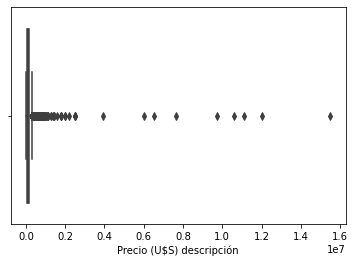

In [59]:
# Vemos que la búsqueda arroja 11160 resultados, con algunos valores extremos muy elevados que tendremos que evaluar.

sns.boxplot(data.loc[precio_usd_mask,'Precio (U$S) descripción'])

In [60]:
data['Precio (U$S) descripción'].nlargest(10)

49083     15500000.0
114131    12000000.0
45689     11111111.0
34816     10585060.0
75155      9750018.0
85286      7660032.0
119431     6500000.0
106376     6000000.0
33364      3950000.0
13528      2500000.0
Name: Precio (U$S) descripción, dtype: float64

In [61]:
data.loc[114131,'Descripción limpia']

'codigo:  ubicado en: monseñor terrero , ituzaingó, buenos aires. -  publicado por: sabrina alvarez propiedades. el precio es de usd 12000000 null. excelente propiedad, apta credito hipotecario  ubicada a 15 cuadras de la estacion, hermoso barrio.  posee garage cubierto pasante, cocina comedor con muebles empotrados en excelente condiciones, 2 dormitorios con placar empotrado, baulera y piso de parket plastificado, aire acondicionado y estufa tiro balanceado se entrega tal cual esta. baño con bañera .  patio, lavdero cubierto con toldo retraible el mismo se extiende de pared a pared para que pueda quedar 1 ambiente totalmente cubierto.  terraza lista para seguir ampliando, en la misma se encuentra otro ambiente mas que puede ser utilizado como 1 dormitorio mas o como guarda utiles. . publicado a través de mapaprop'

Comparamos la columna 'Precio' en U$S, con la nueva obtenida a partir de la descripción. Vemos que solo <b>929</b> de los <b>1160</b> valores encontrados no se encontraban en la columna 'Precio' en USD original.

In [62]:
moneda_mask = data['Moneda']!='USD' 
precio_usd_comparac = data['Precio (U$S) descripción'].notnull() & moneda_mask

precio_usd_comparac.sum()

929

In [63]:
# Creamos una nueva columna en donde consolidamos todos los precios en USD, dando prioridad a la columna original, y 
# luego completando con los valores obtenidos del campo descripción.

data['Precio (U$S) final'] = data.loc[data['Moneda'] == 'USD','Precio']

data.loc[precio_usd_comparac,'Precio (U$S) final'] = data.loc[precio_usd_comparac,'Precio (U$S) descripción']

data['Precio (U$S) final'].isnull().sum()

26897

In [64]:
# Filtramos los valores para que solo muestre precios mayores a 0 y menores que 1e6

precio_usd_recort = (data['Precio (U$S) final'] > 0) & (data['Precio (U$S) final'] < 1e6)

data.loc[precio_usd_recort,'Precio (U$S) final'].describe()

count     82363.000000
mean     214695.140658
std      172948.681742
min           1.000000
25%       98000.000000
50%      155000.000000
75%      270000.000000
max      999999.000000
Name: Precio (U$S) final, dtype: float64

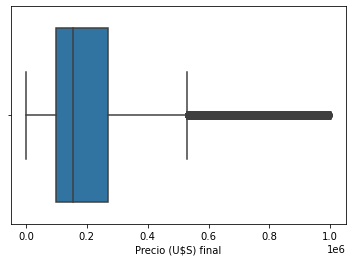

In [65]:
sns.boxplot(data.loc[precio_usd_recort,'Precio (U$S) final'], hue=data['Provincia'])

## Imputaciones de los valores faltantes

In [66]:
#Corroboramos si hay algún valor que se pueda completar de los datos de 
#primero me voy a fijar si existe algun valor que se pueda completar con los datos de superficie total y precio por m2 
# en dolares para los valores de precio en dolares

    
mask_precio_nulo =  data['Precio aproximado (U$S)'].isnull()
mask_superficie_total = data['Superficie total en m2'].notnull()
mask_precio_m2 =  data['Precio por m2'].notnull()
mask_valores_a_completar = mask_superficie_total & mask_precio_m2 & mask_precio_nulo

print ('La cantidad de precios en dolares que se pueden imputar mediante las columnas de superficie en m2 y precio en m2 son ' + \
       str(mask_valores_a_completar.sum()))

La cantidad de precios en dolares que se pueden imputar mediante las columnas de superficie en m2 y precio en m2 son 0


In [67]:
for col in data.columns:
    print(col + " " + str(data[col].isna().sum()))

Tipo de propiedad 0
Provincia 0
Precio 16717
Moneda 16717
Precio aproximado ($) 16717
Precio aproximado (U$S) 16717
Superficie total en m2 36717
Superficie cubierta en m2 17681
Precio U$S por m2 47169
Precio por m2 28785
Piso 104024
Habitaciones 65857
Expensas 98140
Descripción 2
Título 0
Localidad 0
Descripción limpia 2
Dormitorios descripción 35623
cochera 72325
amenities 58975
estrenar 101773
Ambientes descripción 66159
Precio (U$S) descripción 99980
Precio (U$S) final 26897


# Visualización de datos y tratamiento de outliers

Llegado este punto, decidimos enfocarnos en el área metropolitana de Buenos Aires, el AMBA. Tomamos esta decisión ya que allí se concentran la mayoría de las observaciones y tiene un gran interés inmobiliario, además de comprender zonas que geográficamente están cerca con realidades socioeconómicas muy distintas.

Lo primero que vamos a hacer es dropear las filas con valores NaN en el precio para facilitar el trabajo. Dado que nuestro próximo desafío consistirá en predecir con modelos de Machine Learning, imputar valores faltantes con datos que no conocemos puede ser perjudicial para el algoritmo.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

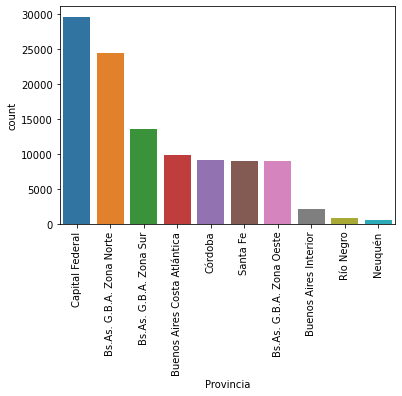

In [68]:
# Creamos un countplot para ver las 10 zonas con más observaciones. En base a esto, elegimos el AMBA.

ax = sns.countplot(x="Provincia", data=data, order=data.Provincia.value_counts().iloc[:10].index)
plt.xticks(rotation=90)


In [69]:
# Dropeamos todos los valores NaN del precio final.

data.dropna(subset = ["Precio (U$S) final"], inplace=True)
data['Precio (U$S) final'].isna().sum()

0

In [70]:
# Creamos un DataFrame para cada zona.

caba_mask =  data['Provincia'] == 'Capital Federal'
caba = data[caba_mask]

gba_norte_mask =  data['Provincia'] == 'Bs.As. G.B.A. Zona Norte'
gba_norte = data[gba_norte_mask]

gba_oeste_mask =  data['Provincia'] == 'Bs.As. G.B.A. Zona Oeste'
gba_oeste = data[gba_oeste_mask]

gba_sur_mask =  data['Provincia'] == 'Bs.As. G.B.A. Zona Sur'
gba_sur = data[gba_sur_mask]

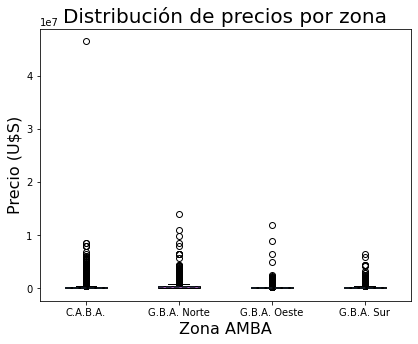

In [71]:
#Intentamos ver la distribución de los datos pero hay tantos outliers que no nos permiten verla claramente.

medianprops = dict(linestyle='--', linewidth=1.5, color='#17202A')

fig, ax = plt.subplots()

bplot= ax.boxplot([caba['Precio (U$S) final'], gba_norte['Precio (U$S) final'], gba_oeste['Precio (U$S) final'], gba_sur['Precio (U$S) final']], vert=True, patch_artist=True, labels=['C.A.B.A.', 'G.B.A. Norte', 'G.B.A. Oeste', 'G.B.A. Sur'], medianprops=medianprops)

colors = ['#E74C3C', '#9B59B6', '#3498DB', '#F39C12']

for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    
plt.xlabel('Zona AMBA', size= 16)
plt.ylabel('Precio (U$S)', size= 16)
plt.title('Distribución de precios por zona', fontdict={'fontsize': 20}, loc='center')

fig.set_size_inches(6.66, 5)

plt.show()

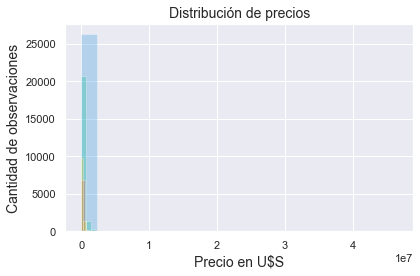

In [72]:
sns.set()
plt.hist(caba['Precio (U$S) final'], bins=20, alpha=0.3, color='#3498DB', histtype='barstacked')
plt.hist(gba_norte['Precio (U$S) final'], bins=20, alpha=0.3, color='#1ABC9C', histtype='barstacked')
plt.hist(gba_oeste['Precio (U$S) final'], bins=20, alpha=0.3, color='#E74C3C', histtype='barstacked')
plt.hist(gba_sur['Precio (U$S) final'], bins=20, alpha=0.3, color='#F1C40F', histtype='barstacked')

plt.xlabel('Precio en U$S', size= 14)
plt.ylabel('Cantidad de observaciones', size= 14)
plt.title('Distribución de precios', fontdict={'fontsize': 14}, loc='center')

plt.tight_layout()
plt.show()

In [73]:
# Hacemos el corte en U$S500.000 que elimina alrededor del 10% de las observaciones y nos permite visualizar claramente
# la distribución.

dataframes = [caba, gba_norte, gba_oeste, gba_sur]

for df in dataframes:
    print(df[df['Precio (U$S) final'] >= 500000].shape[0])
    
for df in dataframes:
    print(df['Precio (U$S) final'].shape[0])

2986
3491
266
620
26457
22530
7039
11461


In [74]:
# Filtramos por precio y ponemos límites de U$S25.000 a U$S500.000.

serie_precio_usd_caba = caba['Precio (U$S) final']
caba_sin_outliers = (serie_precio_usd_caba < 500000) & (serie_precio_usd_caba > 25000)
caba_filtrada = caba.loc[caba_sin_outliers, :]

serie_precio_usd_norte = gba_norte['Precio (U$S) final']
norte_sin_outliers = (serie_precio_usd_norte < 500000) & (serie_precio_usd_norte > 25000)
gba_norte_filtrada = gba_norte.loc[norte_sin_outliers, :]

serie_precio_usd_oeste = gba_oeste['Precio (U$S) final']
oeste_sin_outliers = (serie_precio_usd_oeste < 500000) & (serie_precio_usd_oeste > 25000)
gba_oeste_filtrada = gba_oeste.loc[oeste_sin_outliers, :]

serie_precio_usd_sur = gba_sur['Precio (U$S) final']
sur_sin_outliers = (serie_precio_usd_sur < 500000) & (serie_precio_usd_sur > 25000)
gba_sur_filtrada = gba_sur.loc[sur_sin_outliers, :]

In [75]:
# Y filtramos por ambientes. Elegimos un tope de 10 ambientes que es lo máximo razonable para una propiedad en estas zonas.

serie_ambientes_caba = caba_filtrada['Ambientes descripción']
caba_sin_outliers2 = (serie_ambientes_caba < 10) & (serie_ambientes_caba > 0)
caba_filtrada = caba_filtrada.loc[caba_sin_outliers2, :]

serie_ambientes_norte = gba_norte_filtrada['Ambientes descripción']
norte_sin_outliers2 = (serie_ambientes_norte < 10) & (serie_ambientes_norte > 0)
gba_norte_filtrada = gba_norte_filtrada.loc[norte_sin_outliers2, :]

serie_ambientes_oeste = gba_oeste_filtrada['Ambientes descripción']
oeste_sin_outliers2 = (serie_ambientes_oeste < 10) & (serie_ambientes_oeste > 0)
gba_oeste_filtrada = gba_oeste_filtrada.loc[oeste_sin_outliers2, :]

serie_ambientes_sur = gba_sur_filtrada['Ambientes descripción']
sur_sin_outliers2 = (serie_ambientes_sur < 10) & (serie_ambientes_sur > 0)
gba_sur_filtrada = gba_sur_filtrada.loc[sur_sin_outliers2, :]

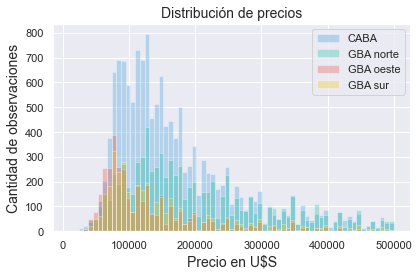

In [76]:
# Histograma con la data filtrada.

bins = np.linspace(10000, 500000, num=70, dtype=list)

sns.set()
plt.hist(caba_filtrada['Precio (U$S) final'], label='CABA', bins=bins, alpha=0.3, color='#3498DB', histtype='barstacked')
plt.hist(gba_norte_filtrada['Precio (U$S) final'], label='GBA norte', bins=bins, alpha=0.3, color='#1ABC9C', histtype='barstacked')
plt.hist(gba_oeste_filtrada['Precio (U$S) final'], label='GBA oeste', bins=bins, alpha=0.3, color='#E74C3C', histtype='barstacked')
plt.hist(gba_sur_filtrada['Precio (U$S) final'], label='GBA sur', bins=bins, alpha=0.3, color='#F1C40F', histtype='barstacked')

plt.xlabel('Precio en U$S', size= 14)
plt.ylabel('Cantidad de observaciones', size= 14)
plt.title('Distribución de precios', fontdict={'fontsize': 14}, loc='center')
plt.legend()

plt.tight_layout()
plt.show()

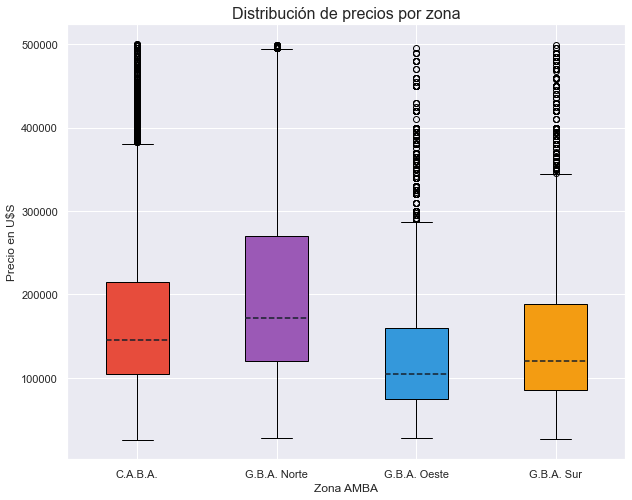

In [77]:
# Boxplot con la data filtrada.

medianprops = dict(linestyle='--', linewidth=1.5, color='#17202A')

fig, ax = plt.subplots()

bplot= ax.boxplot([caba_filtrada['Precio (U$S) final'], gba_norte_filtrada['Precio (U$S) final'], gba_oeste_filtrada['Precio (U$S) final'], gba_sur_filtrada['Precio (U$S) final']], vert=True, patch_artist=True, labels=['C.A.B.A.', 'G.B.A. Norte', 'G.B.A. Oeste', 'G.B.A. Sur'], medianprops=medianprops)

colors = ['#E74C3C', '#9B59B6', '#3498DB', '#F39C12']

for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    
plt.xlabel('Zona AMBA', size= 12)
plt.ylabel('Precio en U$S', size= 12)
plt.title('Distribución de precios por zona', fontdict={'fontsize': 16}, loc='center')

fig.set_size_inches(10, 8)

plt.show()

### Análisis por tipo de propiedad

In [78]:
#Creamos el DataFrame AMBA con todos los filtrados.

amba = pd.concat([caba_filtrada, gba_norte_filtrada, gba_oeste_filtrada, gba_sur_filtrada])
amba

,Tipo de propiedad,Provincia,Precio,Moneda,Precio aproximado ($),Precio aproximado (U$S),Superficie total en m2,Superficie cubierta en m2,Precio U$S por m2,Precio por m2,...,Título,Localidad,Descripción limpia,Dormitorios descripción,cochera,amenities,estrenar,Ambientes descripción,Precio (U$S) descripción,Precio (U$S) final
0,PH,Capital Federal,62000.0,USD,1093959.00,62000.0,55.0,40.0,1127.272727,1550.000000,...,2 AMB TIPO CASA SIN EXPENSAS EN PB,Mataderos,"2 ambientes tipo casa planta baja por pasillo,...",1,NaN,NaN,NaN,2,NaN,62000.0
2,Departamento,Capital Federal,72000.0,USD,1270404.00,72000.0,55.0,55.0,1309.090909,1309.090909,...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,Mataderos,2 ambientes 3er piso lateral living comedor am...,1,NaN,NaN,NaN,2,NaN,72000.0
3,PH,Capital Federal,95000.0,USD,1676227.50,95000.0,NaN,NaN,NaN,NaN,...,PH 3 amb. cfte. reciclado,Liniers,ph 3 ambientes con patio. hay 3 deptos en lote...,NaN,NaN,NaN,NaN,3,NaN,95000.0
8,Departamento,Capital Federal,195000.0,USD,3440677.50,195000.0,65.0,60.0,3000.000000,3250.000000,...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",Belgrano,excelente 2 ambientes estrenar amplio super l...,NaN,NaN,amenities,NaN,2,NaN,195000.0
13,Departamento,Capital Federal,111700.0,USD,1970890.65,111700.0,50.0,30.0,2234.000000,3723.333333,...,Vitraux Palermo,Palermo Soho,torre i mondrian. 3 ambientes con terraza y 2...,NaN,NaN,amenities,NaN,3,NaN,111700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120272,Departamento,Bs.As. G.B.A. Zona Sur,154000.0,USD,2717253.00,154000.0,NaN,60.0,NaN,2566.666667,...,Departamento - Lomas de Zamora Oeste,Lomas de Zamora,"con una ubicación privilegiada, a pocas cuadra...",1,cochera,NaN,NaN,4,NaN,154000.0
120274,Departamento,Bs.As. G.B.A. Zona Sur,130000.0,USD,2293785.00,130000.0,NaN,50.0,NaN,2600.000000,...,Departamento - Lomas de Zamora Oeste,Lomas de Zamora,"con una ubicación privilegiada, a pocas cuadra...",1,cochera,NaN,NaN,4,NaN,130000.0
120275,Departamento,Bs.As. G.B.A. Zona Sur,155000.0,USD,2734897.50,155000.0,NaN,60.0,NaN,2583.333333,...,Departamento - Lomas de Zamora Oeste,Lomas de Zamora,"con una ubicación privilegiada, a pocas cuadra...",1,cochera,NaN,NaN,4,NaN,155000.0
120277,Departamento,Bs.As. G.B.A. Zona Sur,131000.0,USD,2311429.50,131000.0,NaN,50.0,NaN,2620.000000,...,Departamento - Lomas de Zamora Oeste,Lomas de Zamora,"con una ubicación privilegiada, a pocas cuadra...",1,cochera,NaN,NaN,4,NaN,131000.0


In [79]:
# Creamos DataFrames para cada tipo de propiedad con el fin de analizarlas.

ph_mask = amba['Tipo de propiedad'] == 'PH'
ph = amba.loc[ph_mask, :]

depto_mask = amba['Tipo de propiedad'] == 'Departamento'
depto = amba.loc[depto_mask, :]

casa_mask = amba['Tipo de propiedad'] == 'Casa'
casa = amba.loc[casa_mask, :]

local_mask = amba['Tipo de propiedad'] == 'Local'
local = amba.loc[local_mask, :]

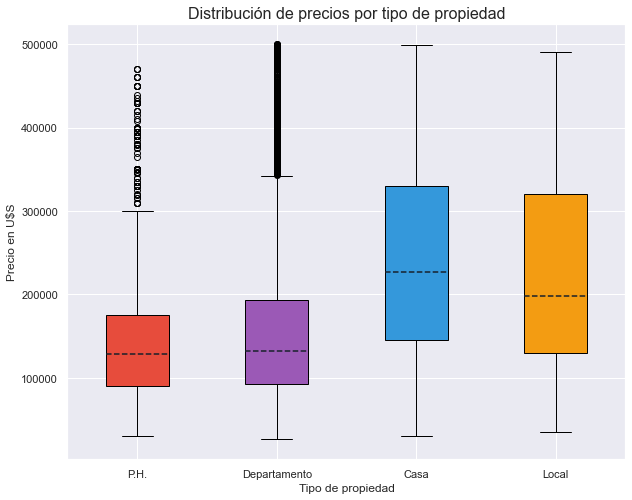

In [80]:
# Boxplot con la data filtrada.

medianprops = dict(linestyle='--', linewidth=1.5, color='#17202A')

fig, ax = plt.subplots()

bplot= ax.boxplot([ph['Precio (U$S) final'], depto['Precio (U$S) final'], casa['Precio (U$S) final'], local['Precio (U$S) final']], vert=True, patch_artist=True, labels=['P.H.', 'Departamento', 'Casa', 'Local'], medianprops=medianprops)

colors = ['#E74C3C', '#9B59B6', '#3498DB', '#F39C12']

for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    
plt.xlabel('Tipo de propiedad', size= 12)
plt.ylabel('Precio en U$S', size= 12)
plt.title('Distribución de precios por tipo de propiedad', fontdict={'fontsize': 16}, loc='center')

fig.set_size_inches(10, 8)

plt.show()

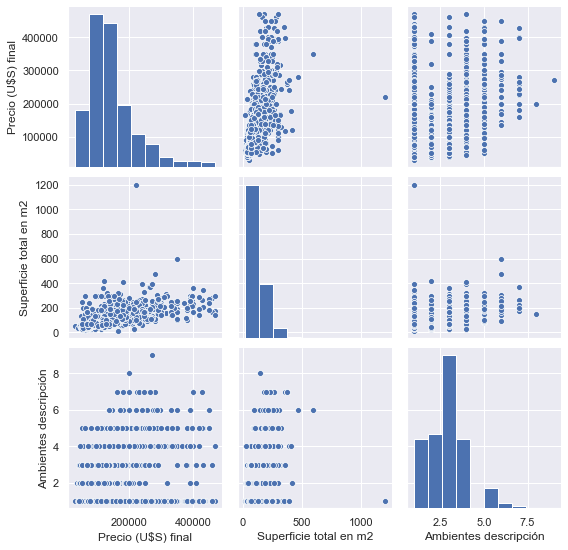

In [81]:
# Vemos la relación entre variables por tipo de propiedad.

sns.pairplot(ph, vars=['Precio (U$S) final', 'Superficie total en m2', 'Ambientes descripción'])

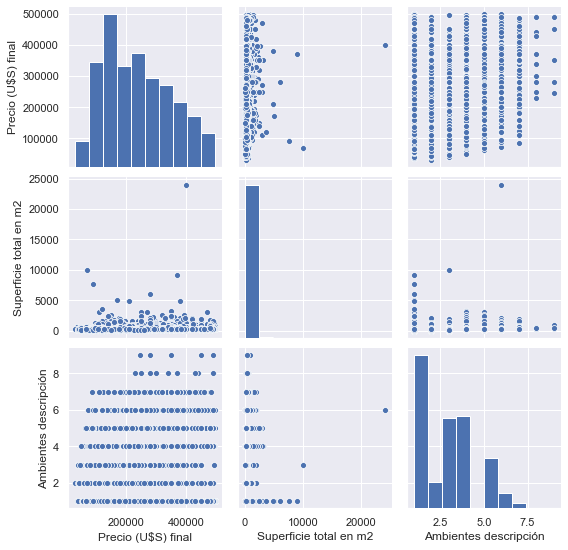

In [82]:
sns.pairplot(casa, vars=['Precio (U$S) final', 'Superficie total en m2', 'Ambientes descripción']) 

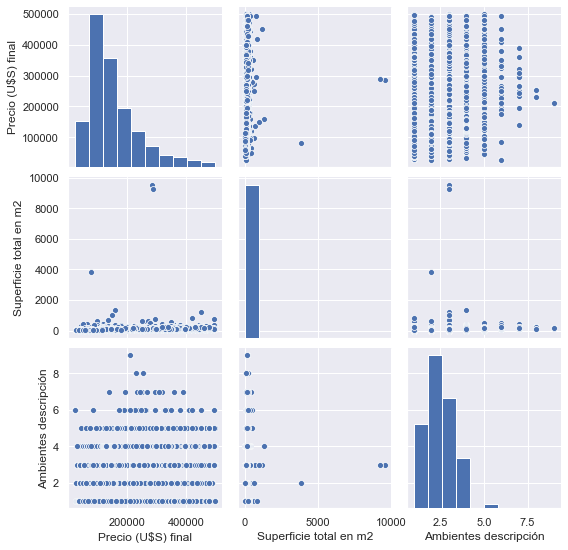

In [83]:
sns.pairplot(depto, vars=['Precio (U$S) final', 'Superficie total en m2', 'Ambientes descripción'])

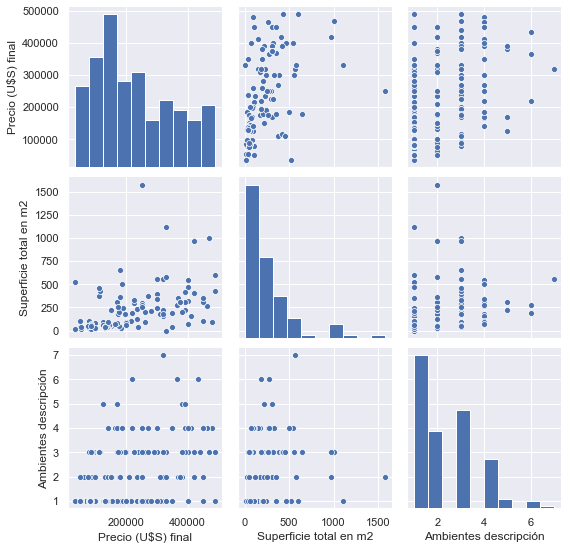

In [84]:
sns.pairplot(local, vars=['Precio (U$S) final', 'Superficie total en m2', 'Ambientes descripción'])

# Summary statistics

Ahora nos enfocamos en ver los distintos valores que resumen la información que tenemos en el subset que nos interesa trabajar y buscamos aprender todo lo posible sobre los datos limpios que ya tenemos.

In [85]:
from scipy import stats

pd.pivot_table(data=amba, values='Precio (U$S) final', index='Provincia', aggfunc=[min, max, np.mean, np.median, stats.mode])

,min,max,mean,median,mode
,Precio (U$S) final,Precio (U$S) final,Precio (U$S) final,Precio (U$S) final,Precio (U$S) final
Provincia,,,,,
Bs.As. G.B.A. Zona Norte,28000.0,499000.0,202915.330980,172000.0,"([125000.0], [143])"
Bs.As. G.B.A. Zona Oeste,28000.0,495000.0,133587.636266,105000.0,"([75000.0], [132])"
Bs.As. G.B.A. Zona Sur,26821.0,499000.0,154548.888978,120000.0,"([120000.0], [119])"
Capital Federal,25935.0,499999.0,173162.591061,145000.0,"([120000.0], [212])"


In [86]:
pd.pivot_table(data=amba, values='Precio (U$S) final', index='Tipo de propiedad', aggfunc=[min, max, np.mean, np.median, stats.mode])

,min,max,mean,median,mode
,Precio (U$S) final,Precio (U$S) final,Precio (U$S) final,Precio (U$S) final,Precio (U$S) final
Tipo de propiedad,,,,,
Casa,30000.0,499000.0,241421.415226,227000.0,"([250000.0], [156])"
Departamento,25935.0,499999.0,157958.157373,131592.5,"([85000.0], [379])"
Local,35000.0,490000.0,228206.721893,198000.0,"([130000.0], [6])"
PH,30000.0,470000.0,145601.403679,128000.0,"([110000.0], [69])"


In [87]:
data['Ambientes descripción'] = data['Ambientes descripción'].apply(pd.to_numeric)
data['Ambientes descripción'].dtypes

dtype('float64')

In [88]:
# Vemos la cantidad de ambientes promedio por propiedad

ambientes = pd.to_numeric(amba['Ambientes descripción']).groupby(amba['Tipo de propiedad'])
ambientes.mean()

Tipo de propiedad
Casa            2.849440
Departamento    2.358245
Local           2.284024
PH              2.810261
Name: Ambientes descripción, dtype: float64

In [89]:
# Separamos por propiedades a estrenar y usadas

a_estrenar_mask = amba['estrenar'] == 'A estrenar'
a_estrenar = amba.loc[a_estrenar_mask, :]

no_a_estrenar_mask = amba['estrenar'] != 'A estrenar'
no_a_estrenar = amba.loc[no_a_estrenar_mask, :]

In [90]:
# Vemos los datos de las propiedades a estrenar.

pd.pivot_table(data=a_estrenar, values='Precio (U$S) final', index='Provincia', aggfunc=[min, max, np.mean, np.median, stats.mode])

,min,max,mean,median,mode
,Precio (U$S) final,Precio (U$S) final,Precio (U$S) final,Precio (U$S) final,Precio (U$S) final
Provincia,,,,,
Bs.As. G.B.A. Zona Norte,35900.0,495000.0,185959.388730,155250.0,"([125000.0], [24])"
Bs.As. G.B.A. Zona Oeste,36554.0,390000.0,95842.573394,80000.0,"([75000.0], [31])"
Bs.As. G.B.A. Zona Sur,26821.0,490000.0,122571.229333,100000.0,"([85000.0], [23])"
Capital Federal,33800.0,490000.0,157052.126941,138000.0,"([125000.0], [28])"


In [91]:
# Vemos los datos de las propiedades usadas

pd.pivot_table(data=no_a_estrenar, values='Precio (U$S) final', index='Provincia', aggfunc=[min, max, np.mean, np.median, stats.mode])

,min,max,mean,median,mode
,Precio (U$S) final,Precio (U$S) final,Precio (U$S) final,Precio (U$S) final,Precio (U$S) final
Provincia,,,,,
Bs.As. G.B.A. Zona Norte,28000.0,499000.0,205442.070453,175000.0,"([250000.0], [124])"
Bs.As. G.B.A. Zona Oeste,28000.0,495000.0,138620.311315,110000.0,"([75000.0], [101])"
Bs.As. G.B.A. Zona Sur,35000.0,499000.0,158114.640500,125000.0,"([120000.0], [117])"
Capital Federal,25935.0,499999.0,175011.455637,145000.0,"([120000.0], [185])"


In [92]:
# Analizamos los ambientes de las propiedades más caras.

serie_propiedades_amba = amba['Precio (U$S) final']
propiedades_lujosas_mask = (serie_propiedades_amba >= 350000)
propiedades_lujosas = amba.loc[propiedades_lujosas_mask, :]

In [93]:
ambientes_lujosas = pd.to_numeric(propiedades_lujosas['Ambientes descripción']).groupby(amba['Tipo de propiedad'])
ambientes_lujosas.mean()

Tipo de propiedad
Casa            2.564567
Departamento    2.950000
Local           3.078947
PH              3.328358
Name: Ambientes descripción, dtype: float64

In [94]:
# Creamos una matriz de correlación para ver tendencias subyacentes entre variables.

amba_filtrada_subset = amba[['Precio (U$S) final', 'Superficie total en m2', 'Ambientes descripción', 'Precio U$S por m2', 'Superficie cubierta en m2']]

corr_matrix = amba_filtrada_subset.corr()
corr_matrix

,Precio (U$S) final,Superficie total en m2,Precio U$S por m2,Superficie cubierta en m2
Precio (U$S) final,1.000000,0.249388,0.216881,0.243903
Superficie total en m2,0.249388,1.000000,-0.239696,0.373411
Precio U$S por m2,0.216881,-0.239696,1.000000,-0.294022
Superficie cubierta en m2,0.243903,0.373411,-0.294022,1.000000


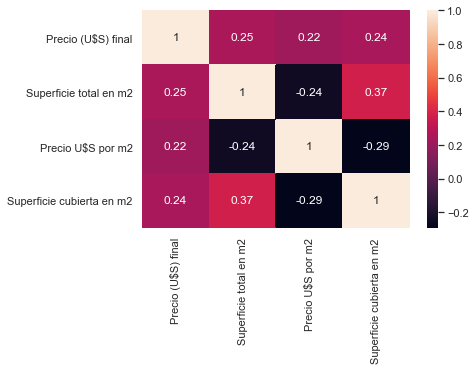

In [95]:
# Heatmap

sns.heatmap(corr_matrix, annot=True)
plt.show()

# Conclusiones

Finalizado el trabajo de limpieza del dataset y realizadas las visualizaciones correspondientes a los aspectos que más nos interesaban, podemos extraer algunas conclusiones interesantes de nuestros resultados.

* G.B.A. Zona Norte es la zona más cara de las cuatro en cuanto a mediana y amplitud de valores en el bigote superior del boxplot. Esto es razonable: la zona norte del Gran Buenos Aires siempre fue conocida por contener algunas de las localidades más costosas, como Olivos, Martínez y Vicente López, entre otras.
* G.B.A. Sur y Oeste tienen rangos de precios más limitados, pero muchos outliers. Es decir, la mayoría de sus valores se concentran en propiedades más bien baratas, pero existe la posibilidad de encontrar otras con precios muchísimo más elevados. Parecieran ser las zonas con más opciones para elegir para más gente.
* Los locales y las casas son en promedio casi el doble de caras que los PH y los departamentos. Sorprendentemente, esto no se trata porque tengan muchos más ambientes: las casas tienen en promedio 2,8 ambientes, lo mismo que los PH y apenas 0.6 ambientes más que los departamentos en promedio. Sin embargo, las casas suelen ser más grandes y no comparten el terreno con otros inquilinos, algo que suele ser valorado por quienes compran ese tipo de propiedades.
* Las variables analizadas no tienen fuertes correlaciones entre ellas. Hay algunas levemente positivas y otras levemente negativas, pero ninguna correlación directa o inversa destacable. Sin embargo, hay una correlación inversa que nos llamó la atención: a mayor cantidad de metros cuadrados, menor valor por metro cuadrado. Al principio pensamos que no tenía mucho sentido, pero si bien hay una relación directa entre precio total y cantidad de metros cuadrados, si una propiedad es muy grande es más difícil venderla en su valor real por metro cuadrado porque requiere un comprador con mucho dinero.
* La mayor cantidad de propiedades en esta zona se encuentran en el rango de los U$S 80.000 a los U$S 200.000. Dado que la media y la mediana de ambientes se encuentran entre 2 y 3 para esta zona y que las propiedades de esa cantidad de ambientes históricamente tienen ese valor en el AMBA, interpretamos que de allí surgen esos valores. Las propiedades significativamente más caras, consideradas de los U$S350.000 en adelante, tienen más ambientes (en promedio hasta uno más) excepto en el caso de las casas.
* Los valores de las propiedades a estrenar son, en promedio, más bajos que los de las casas usadas. Aunque esto pareciera ser contraintuitivo, los emprendimientos inmobiliarios rara vez son para construcción de casas sino de departamentos más bien pequeños y fáciles de vender. En efecto, los precios promedio de las propiedades a estrenar se acercan más a los valores de departamentos de dos ambientes.
